1.81 1.9100000000000001
[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
[ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]


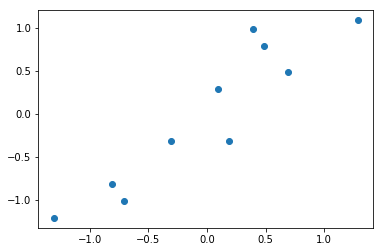

In [24]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y = np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x,mean_y)
scaled_x = x-mean_x
scaled_y = y-mean_y
print(scaled_x)
print(scaled_y)
plt.plot(scaled_x,scaled_y,'o')
plt.show()

In [25]:
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])
cov = np.cov(scaled_x,scaled_y)
print(data)
print(cov)
plt.show()

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


[0.0490834  1.28402771]
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


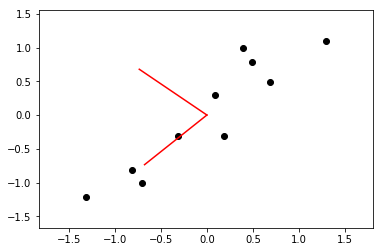

In [26]:
#协方差的特征根和特征向量
eig_val,eig_vec = np.linalg.eig(cov)
print(eig_val)
print(eig_vec)
plt.plot(scaled_x,scaled_y,'o',color = 'black')#o represent dot
xmin ,xmax = scaled_x.min(), scaled_x.max()
ymin, ymax = scaled_y.min(), scaled_y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)#plt.axis([-100, 100, 0, 10000])
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='red')
#eig_vec[:,0][0]的含义：eig_vec[:,0]表示第0列所有数据即arry[-0.73517866,0.6778734]T,eig_vec[:,0][0]表示arry的第0个数据即-0.73517866
plt.show()

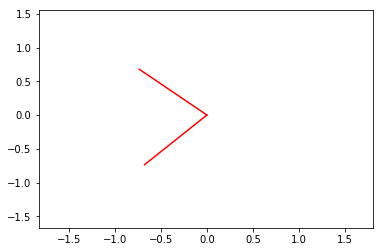

In [27]:
xmin ,xmax = scaled_x.min(), scaled_x.max()
ymin, ymax = scaled_y.min(), scaled_y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)#plt.axis([-100, 100, 0, 10000])
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='red')
plt.show()

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


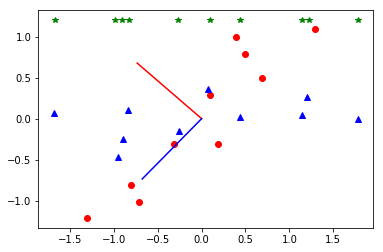

In [28]:
new_data=np.transpose(np.dot(eig_vec,np.transpose(data)))
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)#降序排列
feature=eig_pairs[0][1]#choose the max eig_value
new_data_reduced=np.transpose(np.dot(feature,np.transpose(data)))
print(new_data_reduced)
plt.plot(scaled_x,scaled_y,'o',color='red')
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='blue')
plt.plot(new_data[:,0],new_data[:,1],'^',color='blue')
plt.plot(new_data_reduced[:,0],[1.2]*10,'*',color='green')
plt.show()

In [34]:
#method2:sclearn
from sklearn.decomposition import PCA
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
pca=PCA(n_components=1)
pca.fit(X)
print(pca.transform(X))
plt.show()

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


In [31]:
#method3:
result = np.dot(X.T,X)
print(result)
eig_value,eig_vector = np.linalg.eig(result)
print(eig_value)
print(eig_vec)
plt.show()

[[38.31 40.11]
 [40.11 42.93]]
[ 0.44353674 80.79646326]
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
